WeatherPy

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/matthewvicario/Desktop/Python-API-Challenge/WeatherPy/Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

Perform API Calls

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = (f"{url}appid={weather_api_key}&units&q=")

countries = []
city_name = []
date = []
cloudiness = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        w_response = requests.get(query_url + city).json()
        countries.append(w_response["sys"]["country"])
        city_name.append(w_response ["name"])
        date.append(w_response ["dt"])
        cloudiness.append(w_response["clouds"]["all"])
        humidity.append(w_response["main"]["humidity"])
        lat.append(w_response["coord"]["lat"])
        lng.append(w_response["coord"]["lon"])
        max_temp.append(w_response["main"]["temp_max"])
        wind_speed.append(w_response ["wind"] ["speed"])
        
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
        
        else:
            index_count = index_count + 1   

        print(f"Processing Record {index_count} of Set {set_count} : {city}")
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : east london
Processing Record 2 of Set 1 : yulara
Processing Record 3 of Set 1 : khatanga
Processing Record 4 of Set 1 : airai
Processing Record 5 of Set 1 : itanhem
Processing Record 6 of Set 1 : yinchuan
Processing Record 7 of Set 1 : hofn
Processing Record 8 of Set 1 : husavik
Processing Record 9 of Set 1 : hobart
Processing Record 10 of Set 1 : nikolskoye
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : puqi
Processing Record 13 of Set 1 : mar del plata
Processing Record 14 of Set 1 : fortuna
Processing Record 15 of Set 1 : dunedin
Processing Record 16 of Set 1 : bajil
Processing Record 17 of Set 1 : bonthe
Processing Record 18 of Set 1 : barrow
Processing Record 19 of Set 1 : flinders
Processing Record 20 of Set 1 : kapaa
Processing Record 21 of Set 1 : ushuaia
Processing Record 22 of Set 1 : talnakh
Processing Record 23 of Set 1 : busselton
Processing Record 24 of Set 1 : 

Convert Raw Data to DataFrame

In [5]:
#Export the city data into a .csv.
#Display the DataFrame
weather_data = {"City": city_name,
                            "Lat": lat, 
                            "Lng": lng, 
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": countries,
                            "Date": date}
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,292.15,19,0,3.60,ZA,1595059155
1,Yulara,-25.24,130.99,298.15,12,5,2.10,AU,1595059155
2,Khatanga,71.97,102.50,280.09,86,100,2.53,RU,1595059156
3,Airai,-8.93,125.41,293.47,60,4,1.74,TL,1595059157
4,Itanhém,-17.17,-40.33,287.98,88,11,0.58,BR,1595059158
...,...,...,...,...,...,...,...,...,...
588,Ixtapa,20.70,-105.20,299.82,80,99,1.11,MX,1595059620
589,Quatre Cocos,-20.21,57.76,297.04,53,40,6.20,MU,1595059621
590,Kozhva,65.11,57.05,297.04,56,36,1.84,RU,1595059622
591,Rassvet,46.83,40.75,298.43,62,51,2.57,RU,1595059623


In [7]:
# Save city data into a csv file
weather_df.to_csv("output_data/cities.csv", index = False)

Inspect the data and remove the cities where the humidity > 100%

In [8]:
max_humidity = weather_df["Humidity"].max()
max_humidity

100

Plotting the Data -  Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


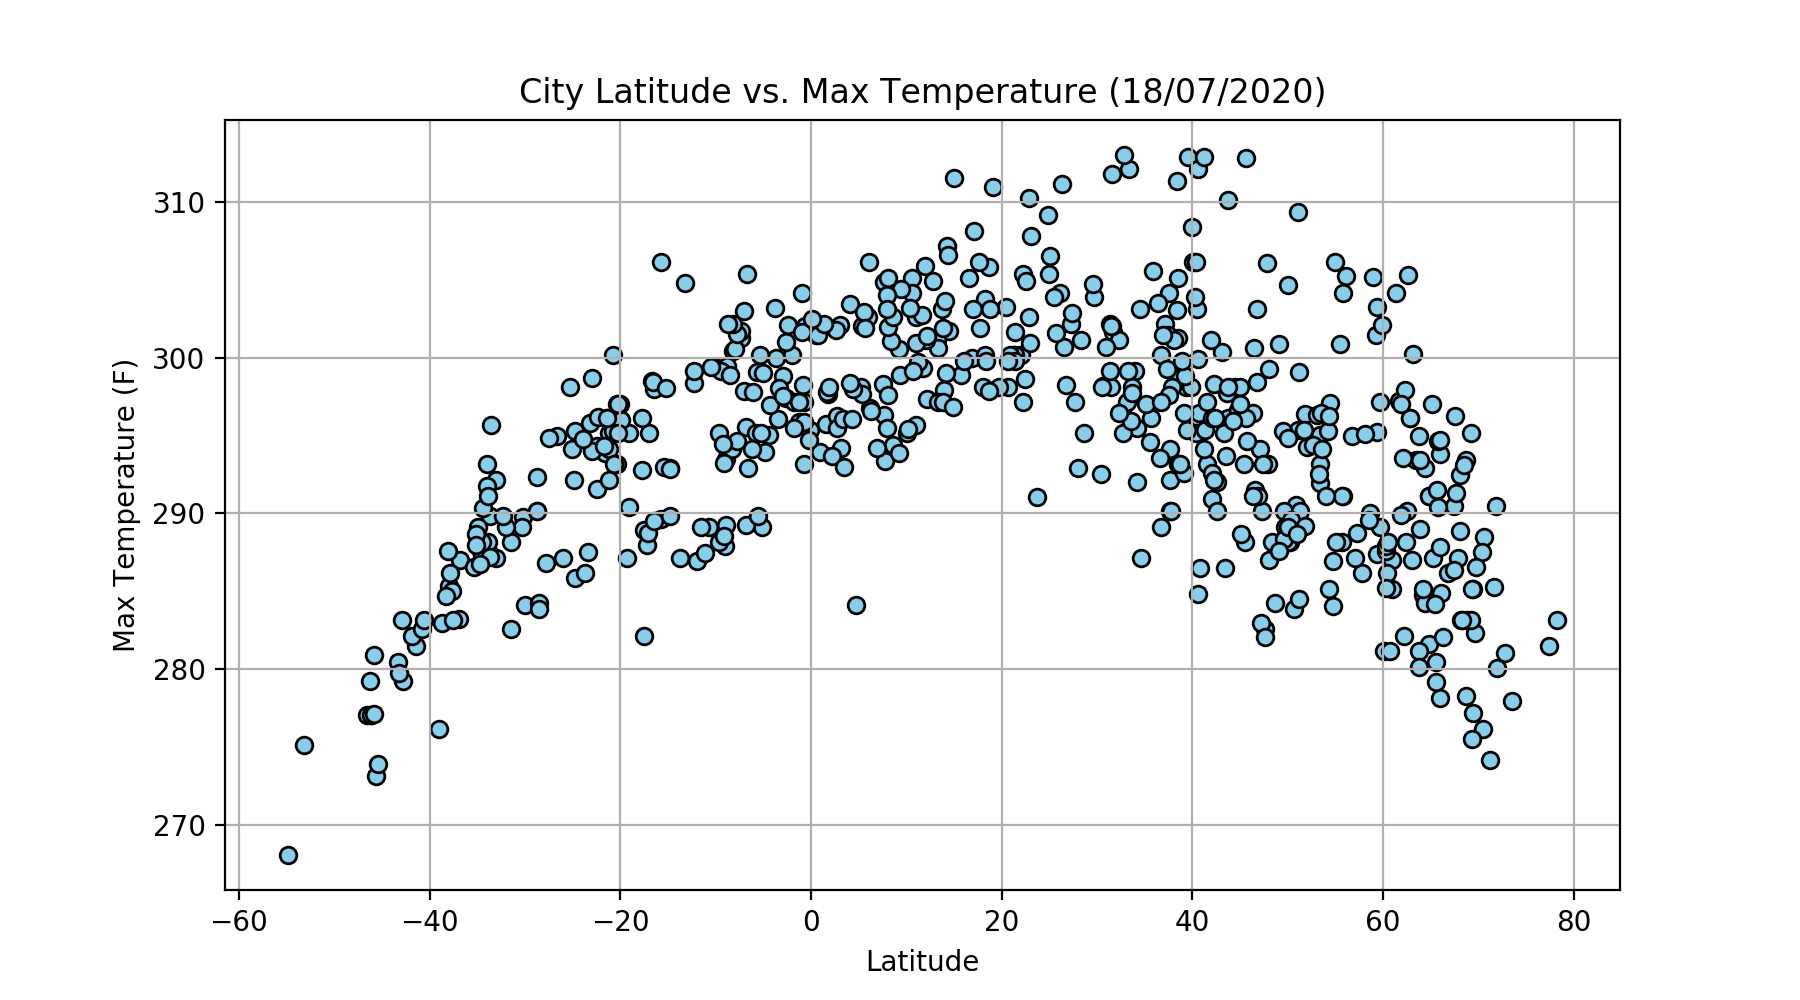

In [19]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
plt.figure(figsize=(9,5))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = 'o', edgecolor = 'black', facecolor = 'skyblue')
plt.grid()
plt.title("City Latitude vs. Max Temperature (18/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/Lat_VS_MaxTemp.png")
plt.show()

Plotting the Data -  Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


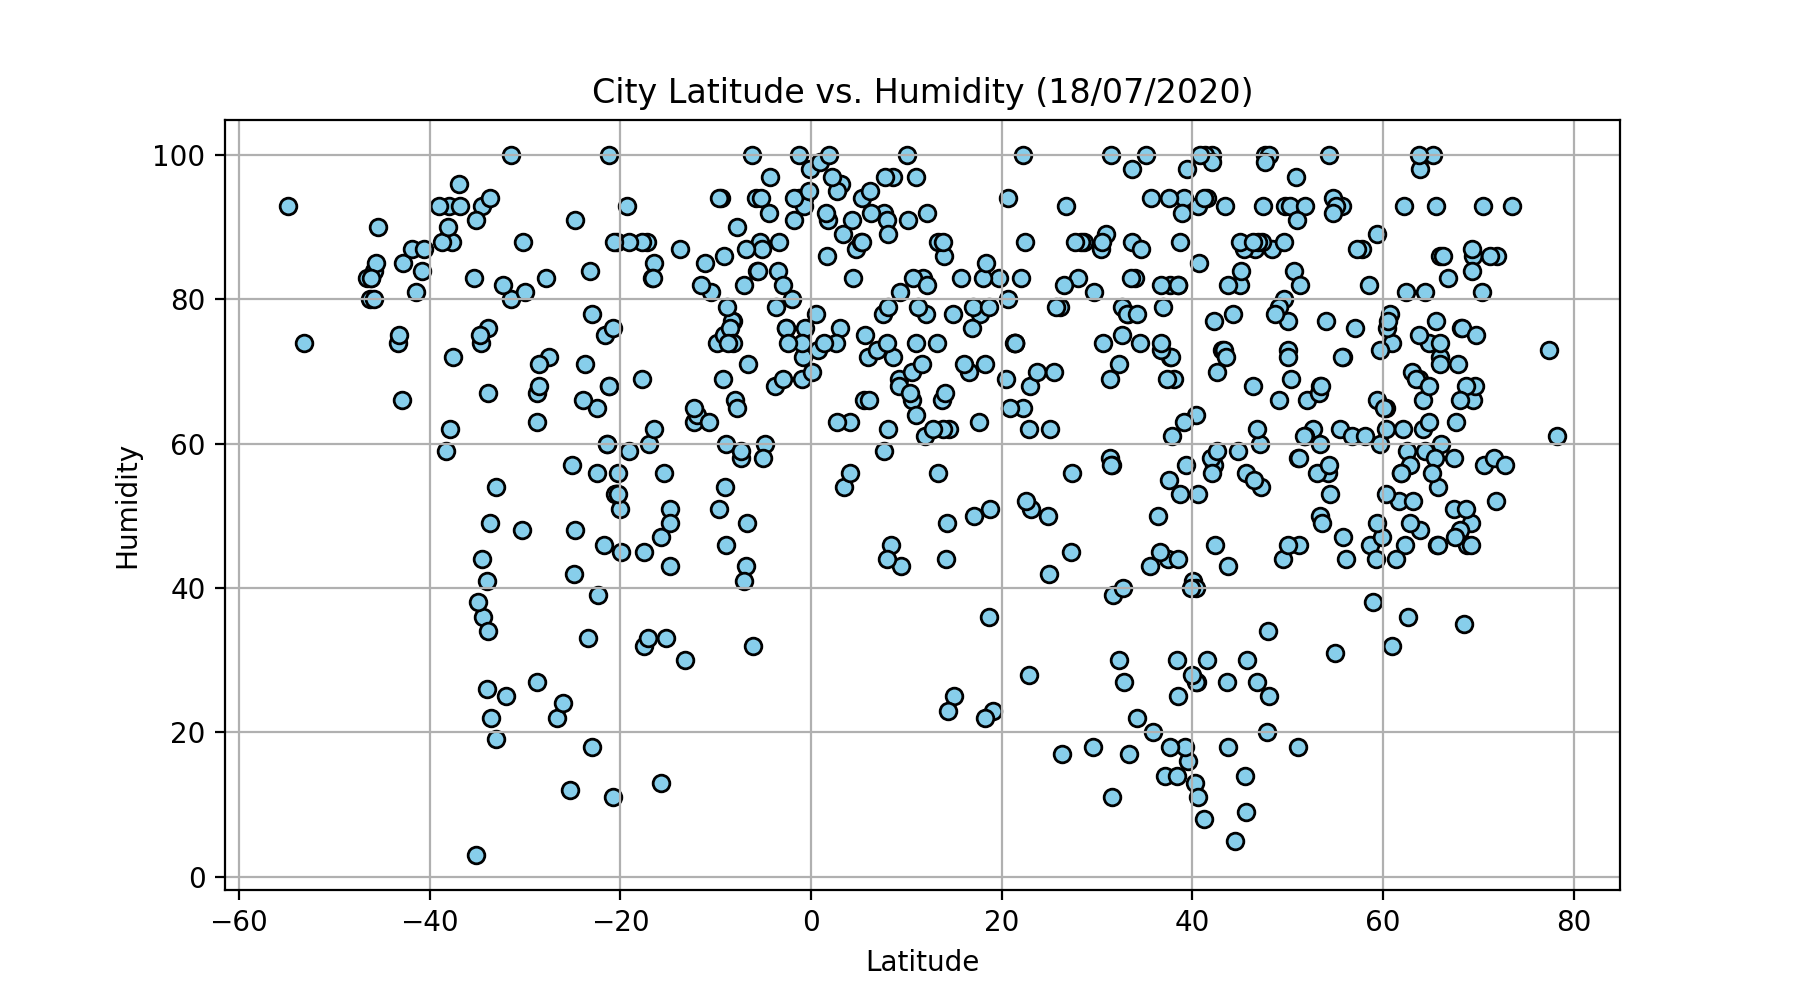

In [20]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
plt.figure(figsize=(9,5))
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = 'o', edgecolor = 'black', facecolor = 'skyblue')
plt.grid()
plt.title("City Latitude vs. Humidity (18/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Lat_VS_Humidty.png")
plt.show()

Plotting the Data - Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


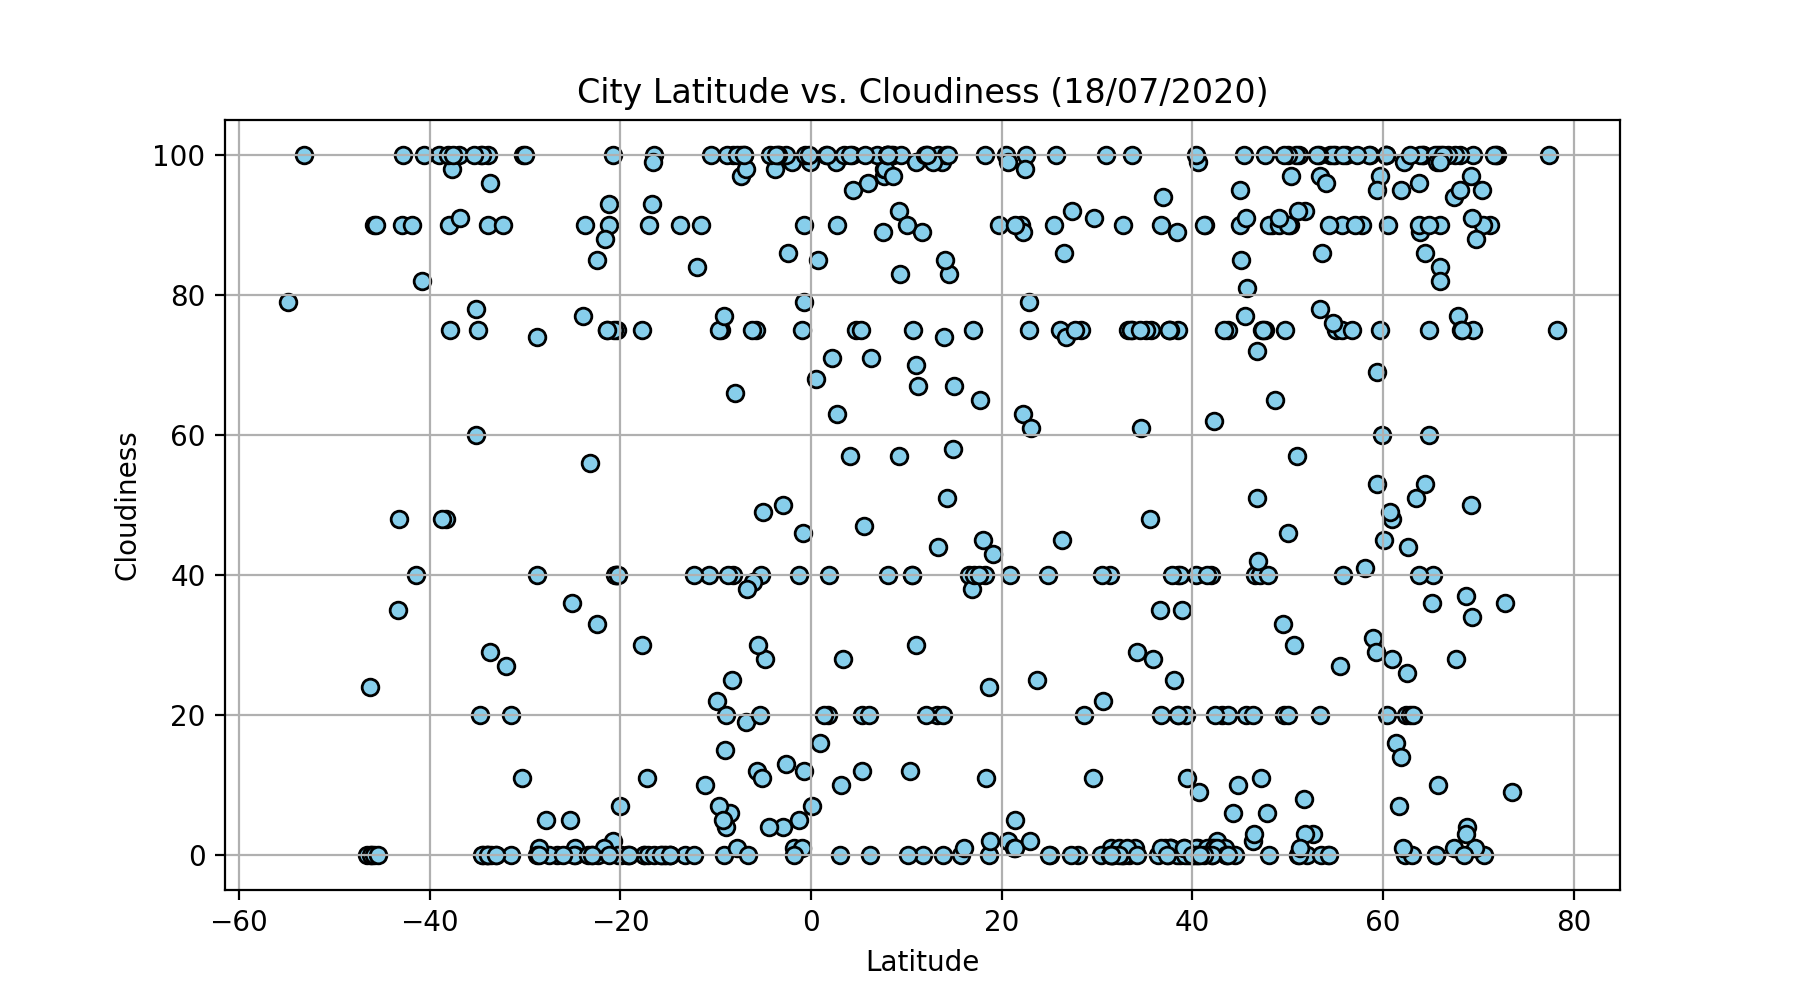

In [25]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
plt.figure(figsize=(9,5))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = 'o', edgecolor = 'black', facecolor = 'skyblue')
plt.grid()
plt.title("City Latitude vs. Cloudiness (18/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Lat_VS_Cloudiness.png")
plt.show()

Plotting the Data - Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


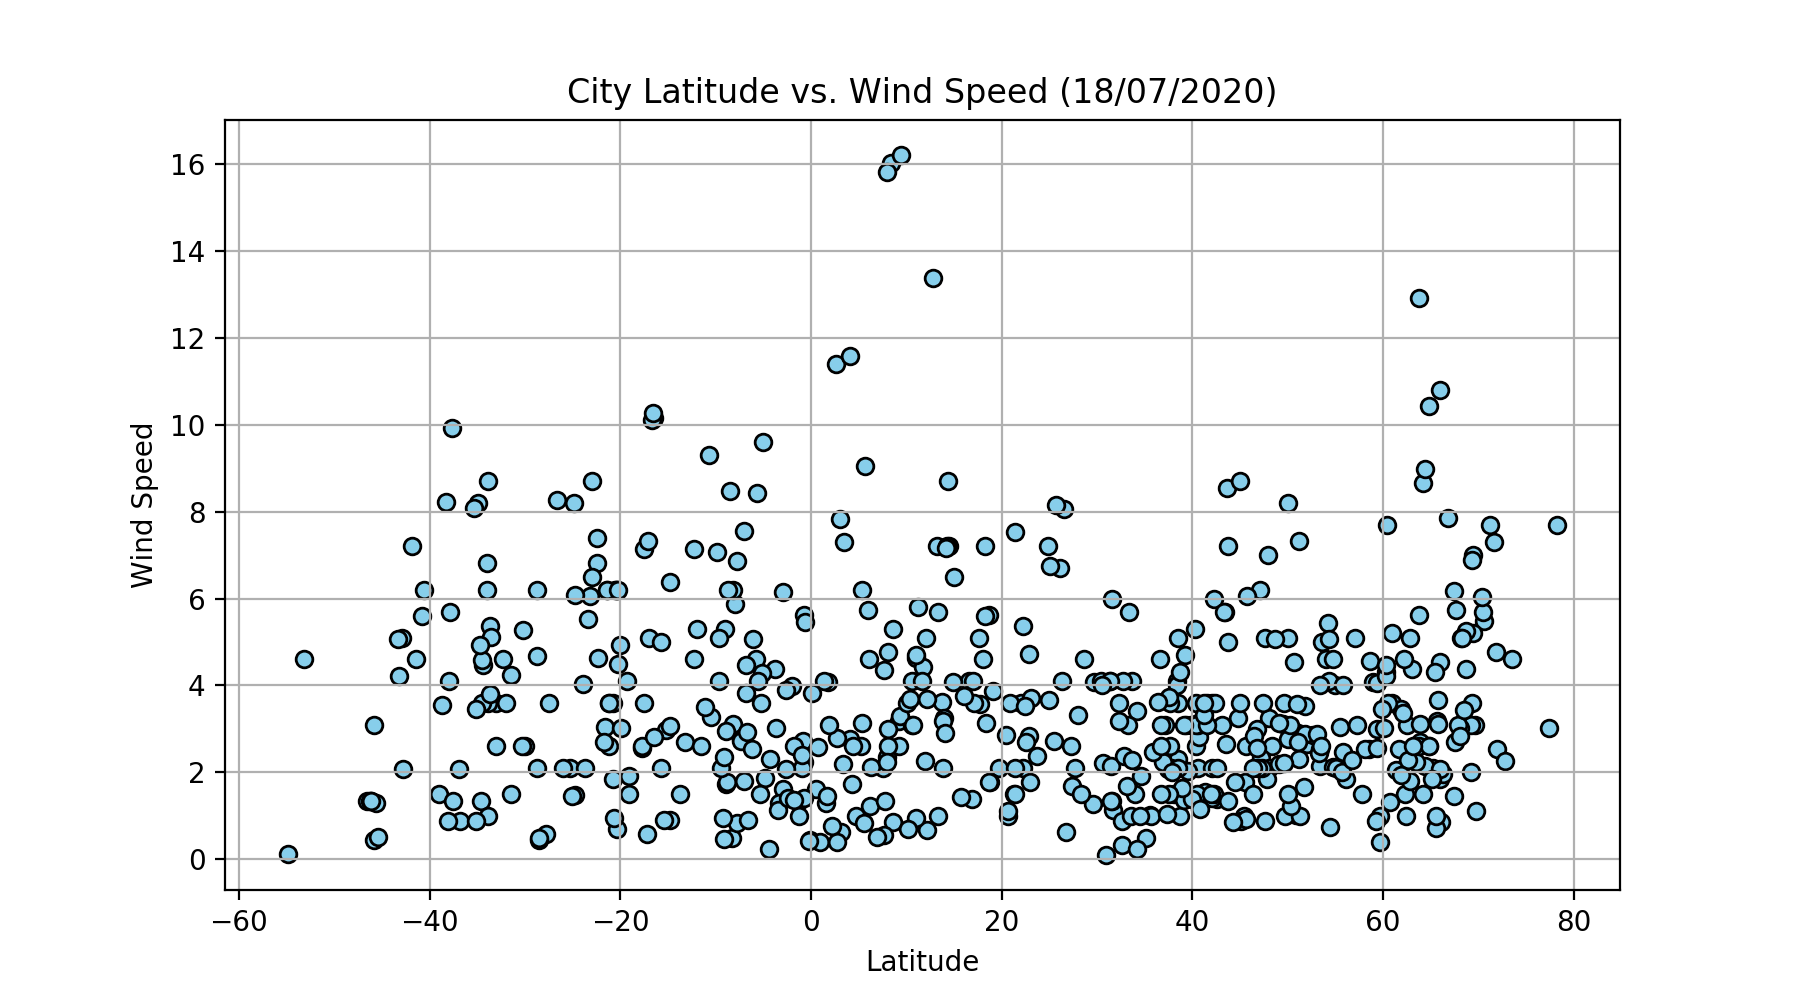

In [26]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
plt.figure(figsize=(9,5))
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = 'o', edgecolor = 'black', facecolor = 'skyblue')
plt.grid()
plt.title("City Latitude vs. Wind Speed (18/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Lat_VS_WindSpeed.png")
plt.show()